### Concat csv files of every months in 2019 into one csv

In [1]:
import pandas as pd
import glob 
# * meaning get all directory
all_filenames=[file for file in glob.glob('Sales_Data/*')]
# df = pd.concat([pd.read_csv(f, skiprows=1) for f in all_filenames ])
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### 因為我在concat每個月份的csv檔時沒有skip掉第一個row，因此要處理掉一些row

In [2]:
df=df[df['Order Date']!='Order Date']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### 把index重新排序

In [3]:
df=df.reset_index(drop=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Question 1: 銷售最好的月份是哪一個月？那一個月賺了多少錢

In [4]:
df['month']=df['Order Date'].apply(lambda x: x.split()[0].split('/')[0])
df

AttributeError: 'float' object has no attribute 'split'

### 上面出現問題，同一個Series有不同datatype，要把float轉為String

In [5]:
df['Order Date'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [6]:
df['Order_Date_type']=df['Order Date'].apply(type)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",<class 'str'>
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",<class 'str'>
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",<class 'str'>
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",<class 'str'>
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",<class 'str'>
...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",<class 'str'>
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",<class 'str'>
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",<class 'str'>
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",<class 'str'>


### 印出非string的rows 發現許多空值 前面應當先用df.info()檢查

In [7]:
df[df['Order_Date_type']!=str]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type
263,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
647,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
679,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
1382,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
1492,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
...,...,...,...,...,...,...,...
185441,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
185514,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
185533,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>
185606,NaN,NaN,NaN,NaN,NaN,NaN,<class 'float'>


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Order_Date_type   186495 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [9]:
df=df.dropna(axis=0)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",<class 'str'>
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",<class 'str'>
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",<class 'str'>
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",<class 'str'>
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",<class 'str'>
...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",<class 'str'>
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",<class 'str'>
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",<class 'str'>
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",<class 'str'>


In [10]:
# try one more time after dropping null

In [11]:
df['month']=df['Order Date'].apply(lambda x: x.split()[0].split('/')[0])
df

/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",<class 'str'>,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",<class 'str'>,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",<class 'str'>,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",<class 'str'>,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",<class 'str'>,12
...,...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",<class 'str'>,06
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",<class 'str'>,06
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",<class 'str'>,06
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",<class 'str'>,06


In [12]:
#sales = Quantity Ordered * Price Each
df[['Quantity Ordered', 'Price Each']]=df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric)
df['sales']=df['Quantity Ordered']*df['Price Each']
df['sales']=df['sales'].astype(int)
# df.groupby('month').sum().sort_values(by=['sales'], ascending=False)
df_months=df.groupby('month').sum()
df_months=df_months[['sales']]
df_months['months']=df_months.index
df_months=df_months.reset_index(drop=True)
df_months=df_months[df_months.columns[-1::-1]]
# df_months=df_months
df_months

/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hayashishifuchi/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/ipykernel_launcher

,months,sales
0,01,1815143
1,02,2193165
2,03,2795907
3,04,3377215
4,05,3140375
5,06,2567871
6,07,2637209
7,08,2235667
8,09,2088915
9,10,3721615


### Using matplot to visualize the sales

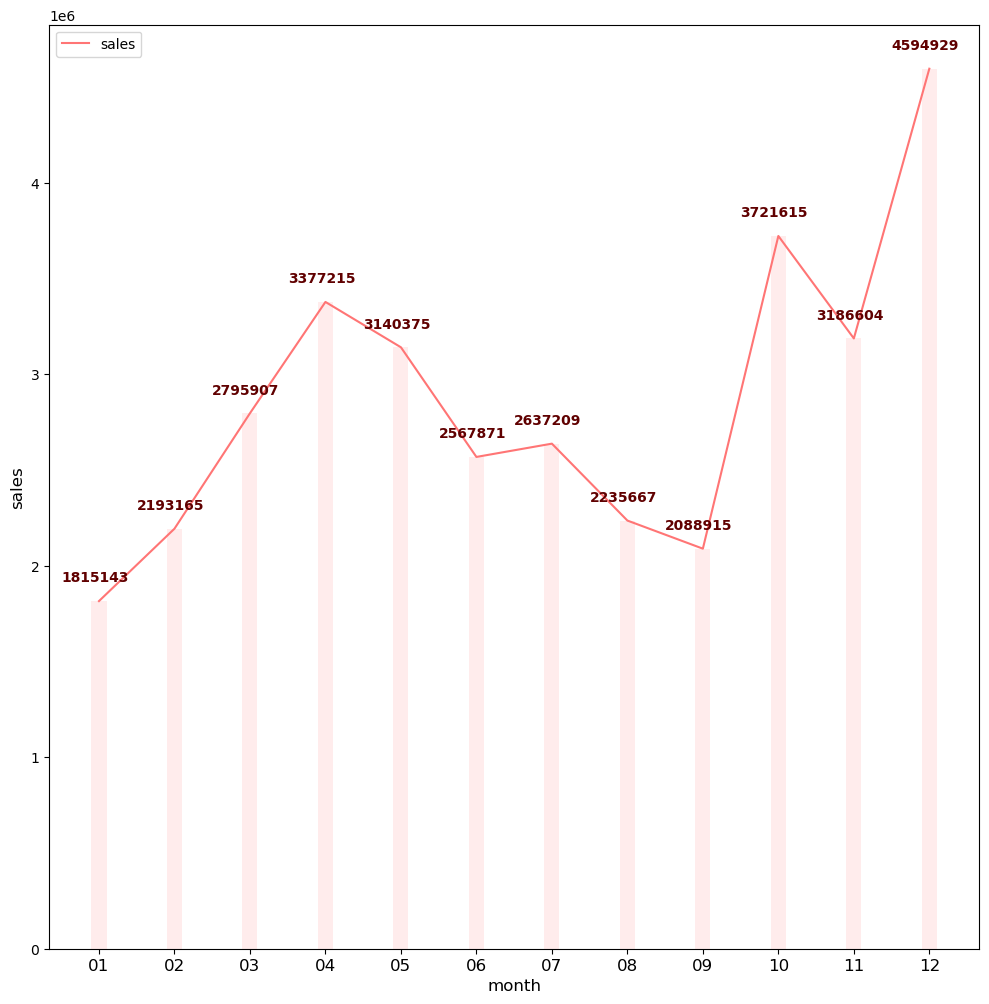

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# plt.figure(figsize=(12,12))
# plt.plot(df_months['months'], df_months['sales'], color='#FF7575', label='sales')
# plt.bar(df_months['months'], df_months['sales'], color='#FFECEC')
# plt.xlabel('months', fontsize=10)
# plt.ylabel('sales', fontsize=10)
# plt.legend(loc='upper left', fontsize=10)
# plt.show()


x = df_months['months']
y=df_months['sales']
fig, ax = plt.subplots(figsize=(12, 12))    
width = 0.2 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width, color="#FFECEC")
ax.set_xticks(ind)
ax.set_xticklabels(x, fontsize=12)
plt.plot(df_months['months'], df_months['sales'], color='#FF7575', label='sales')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('month', fontsize=12)
plt.ylabel('sales', fontsize=12)    
for i, v in enumerate(y):
    ax.text(i-0.5, v+100000, str(v), color='#600000', fontweight='bold')
plt.show()

## Ans: 我們可以根據上面的分析結果得出結論12月銷售最好，並且得知12月的銷量

## Question 2: 哪個城市的銷售額最高？

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186494
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Order_Date_type   185950 non-null  object 
 7   month             185950 non-null  object 
 8   sales             185950 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ MB


In [85]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",<class 'str'>,12,1700
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",<class 'str'>,12,600
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",<class 'str'>,12,11
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",<class 'str'>,12,149
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",<class 'str'>,12,11


In [86]:
df=df.drop(columns=['Order_Date_type'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11
...,...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11


### create cities column

In [87]:
df['city']=df['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11,GA
...,...,...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2,MA
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149,NY
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11,CA
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11,CA


In [88]:
df_sales=df.groupby('city').sum()
df_sales['city']=df_sales.index.values
df_sales=df_sales.reset_index(drop=True)
df_sales=df_sales[df_sales.columns[-1:1:-1]]
df_sales

,city,sales
0,CA,13659765
1,GA,2784555
2,MA,3646904
3,ME,447951
4,NY,4645903
5,OR,1863342
6,TX,4569314
7,WA,2736881


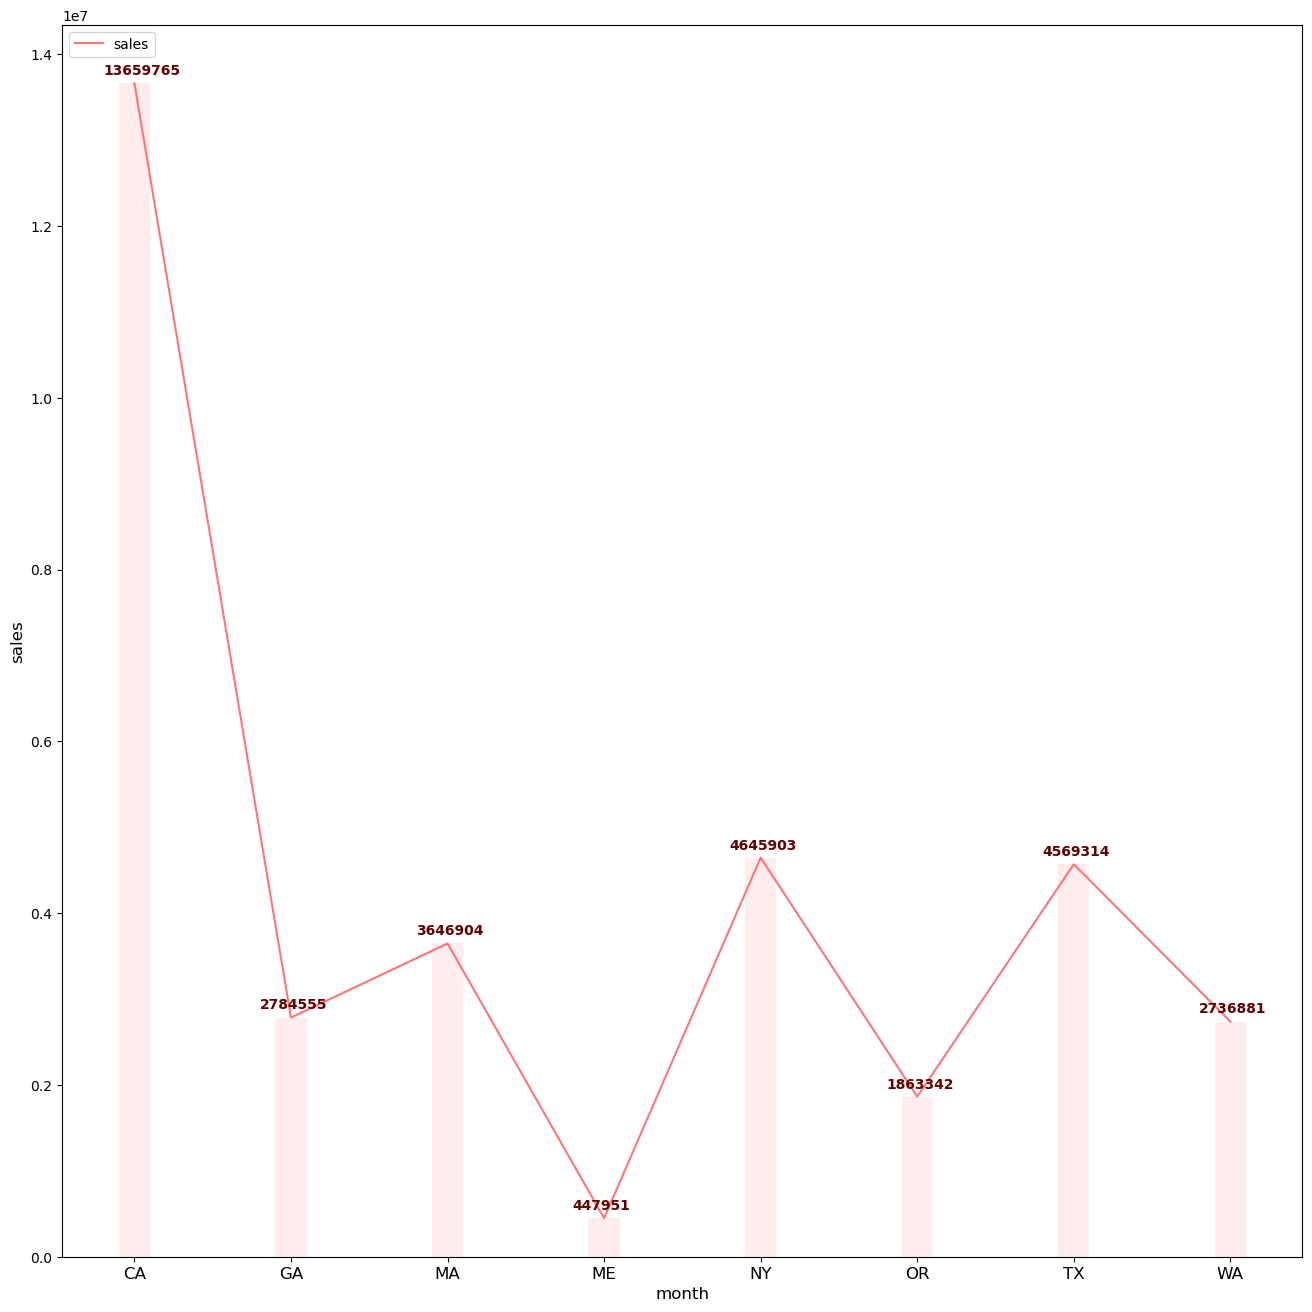

In [89]:
x = df_sales['city']
y=df_sales['sales']
fig, ax = plt.subplots(figsize=(16, 16))    
width = 0.2 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width, color="#FFECEC")
ax.set_xticks(ind)
ax.set_xticklabels(x, fontsize=12)
plt.plot(df_sales['city'], df_sales['sales'], color='#FF7575', label='sales')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('month', fontsize=12)
plt.ylabel('sales', fontsize=12)    
for i, v in enumerate(y):
    ax.text(i-0.2, v+100000, str(v), color='#600000', fontweight='bold')
plt.show()

## Ans: 我們可以根據上面的圖發現 CA(california)是銷售最好的城市

## Question 3: 公司應該在什麼時候投放廣告，有最大的機率提高客戶購買產品的可能性？

In [90]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11,GA
...,...,...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2,MA
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149,NY
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11,CA
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11,CA


In [93]:
df['hour']=df['Order Date'].apply(lambda x: x.split()[1].split(':')[0])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,NY,00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600,NY,07
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11,NY,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149,CA,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11,GA,12


In [102]:
df_hour=df.groupby('hour')['Quantity Ordered'].agg(sum)
df_hour=df_hour.to_frame()
df_hour['hour']=df_hour.index
df_hour=df_hour.reset_index(drop=True)
df_hour=df_hour[df_hour.columns[::-1]]
df_hour

,hour,Quantity Ordered
0,00,4428
1,01,2619
2,02,1398
3,03,928
4,04,937
5,05,1493
6,06,2810
7,07,4556
8,08,7002
9,09,9816


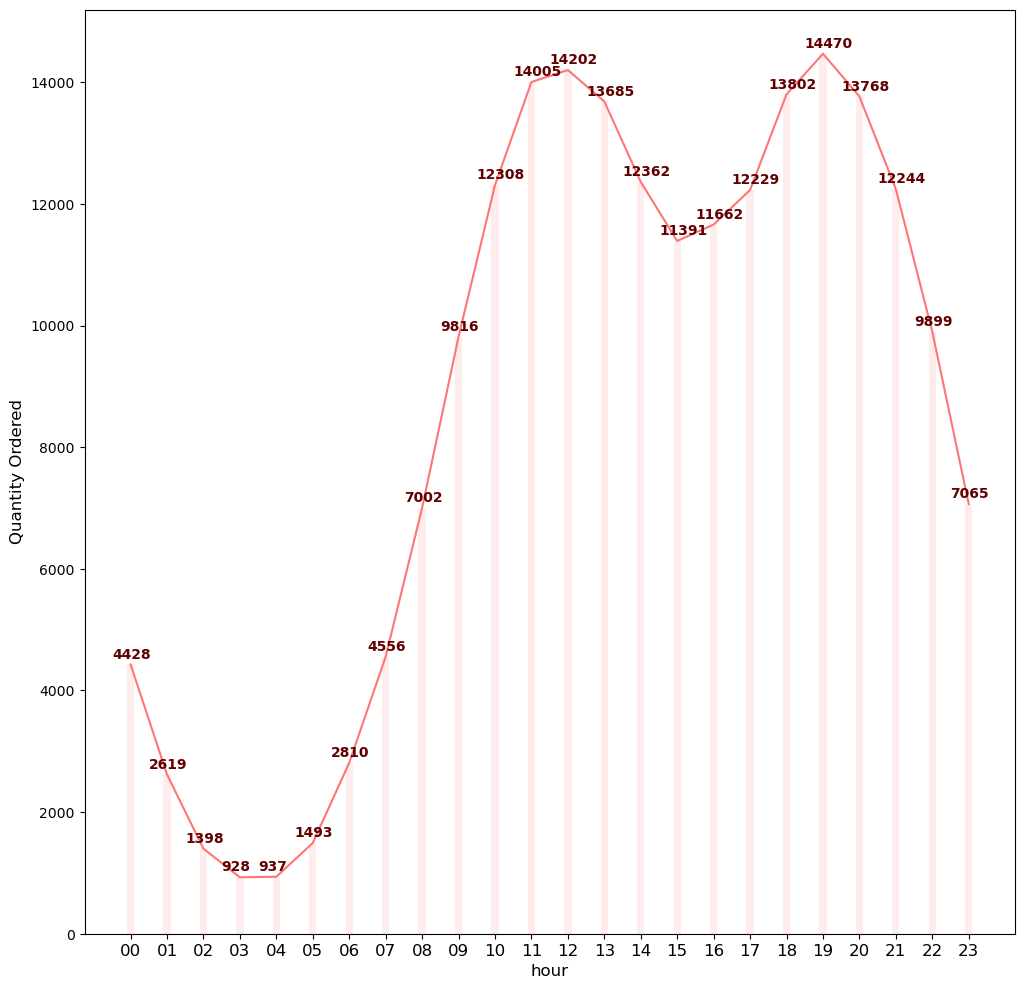

In [109]:
x = df_hour['hour']
y=df_hour['Quantity Ordered']
fig, ax = plt.subplots(figsize=(12, 12))    
width = 0.2 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width, color="#FFECEC")
ax.set_xticks(ind)
ax.set_xticklabels(x, fontsize=12)
plt.plot(df_hour['hour'], df_hour['Quantity Ordered'], color='#FF7575')
# plt.legend(loc='upper left', fontsize=10)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)    
for i, v in enumerate(y):
    ax.text(i-0.5, v+100, str(v), color='#600000', fontweight='bold')
plt.show()

## Ans: 由上圖可知道 12跟19點是最適合投放廣告的時機

## Question 4: 哪些產品最常一起銷售？

In [66]:
df_bundle=df.sort_values(['Order ID'])

In [67]:
df_bundle

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type,month,sales
137184,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",<class 'str'>,01,700
137185,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",<class 'str'>,01,14
137186,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",<class 'str'>,01,23
137187,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",<class 'str'>,01,149
137188,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",<class 'str'>,01,11
...,...,...,...,...,...,...,...,...,...
25064,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",<class 'str'>,12,14
25065,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",<class 'str'>,12,7
25066,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",<class 'str'>,12,400
25067,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",<class 'str'>,12,11


In [68]:
df_bundle['Order ID']=df_bundle['Order ID'].apply(pd.to_numeric)
df_bundle['bool']=df_bundle.duplicated(subset=['Order ID'], keep=False)#default is keep=first
df_bundle=df_bundle[df_bundle['bool']==True]
df_bundle

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type,month,sales,bool
137226,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",<class 'str'>,01,11,True
137225,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",<class 'str'>,01,11,True
137241,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",<class 'str'>,01,150,True
137242,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",<class 'str'>,01,11,True
137317,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",<class 'str'>,01,400,True
...,...,...,...,...,...,...,...,...,...,...
24980,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",<class 'str'>,12,11,True
24993,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",<class 'str'>,12,14,True
24992,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",<class 'str'>,12,700,True
25028,319631,34in Ultrawide Monitor,1,379.99,12/17/19 22:35,"363 Highland St, Austin, TX 73301",<class 'str'>,12,379,True


In [69]:
df_bundle

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_type,month,sales,bool
137226,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",<class 'str'>,01,11,True
137225,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",<class 'str'>,01,11,True
137241,141290,Apple Airpods Headphones,1,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",<class 'str'>,01,150,True
137242,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",<class 'str'>,01,11,True
137317,141365,Vareebadd Phone,1,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",<class 'str'>,01,400,True
...,...,...,...,...,...,...,...,...,...,...
24980,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",<class 'str'>,12,11,True
24993,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",<class 'str'>,12,14,True
24992,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",<class 'str'>,12,700,True
25028,319631,34in Ultrawide Monitor,1,379.99,12/17/19 22:35,"363 Highland St, Austin, TX 73301",<class 'str'>,12,379,True


In [70]:
def glue(series):
    return ','.join(list(series))
df_bundle=df_bundle.groupby('Order ID')['Product'].agg(glue).to_frame()


In [71]:
df_bundle=df_bundle.groupby('Product').size()
df_bundle=df_bundle.to_frame('count')

In [72]:
df_bundle['Product']=df_bundle.index
df_bundle=df_bundle.reset_index(drop=True)
df_bundle


,count,Product
0,3,"20in Monitor,20in Monitor"
1,1,"20in Monitor,27in 4K Gaming Monitor"
2,1,"20in Monitor,27in FHD Monitor"
3,1,"20in Monitor,34in Ultrawide Monitor"
4,7,"20in Monitor,AA Batteries (4-pack)"
...,...,...
403,10,"iPhone,USB-C Charging Cable"
404,3,"iPhone,Vareebadd Phone"
405,273,"iPhone,Wired Headphones"
406,1,"iPhone,Wired Headphones,Lightning Charging Cable"


In [73]:
df_bundle=df_bundle[df_bundle.columns[::-1]]
df_bundle

,Product,count
0,"20in Monitor,20in Monitor",3
1,"20in Monitor,27in 4K Gaming Monitor",1
2,"20in Monitor,27in FHD Monitor",1
3,"20in Monitor,34in Ultrawide Monitor",1
4,"20in Monitor,AA Batteries (4-pack)",7
...,...,...
403,"iPhone,USB-C Charging Cable",10
404,"iPhone,Vareebadd Phone",3
405,"iPhone,Wired Headphones",273
406,"iPhone,Wired Headphones,Lightning Charging Cable",1


In [74]:
df_bundle=df_bundle.sort_values('count', ascending=False)

In [75]:
df_bundle=df_bundle.reset_index(drop=True)
df_bundle=df_bundle[:10]
df_bundle

,Product,count
0,"iPhone,Lightning Charging Cable",649
1,"Google Phone,USB-C Charging Cable",626
2,"iPhone,Wired Headphones",273
3,"Lightning Charging Cable,iPhone",242
4,"USB-C Charging Cable,Google Phone",242
5,"Vareebadd Phone,USB-C Charging Cable",236
6,"iPhone,Apple Airpods Headphones",218
7,"Google Phone,Wired Headphones",217
8,"Google Phone,Bose SoundSport Headphones",123
9,"Wired Headphones,iPhone",101


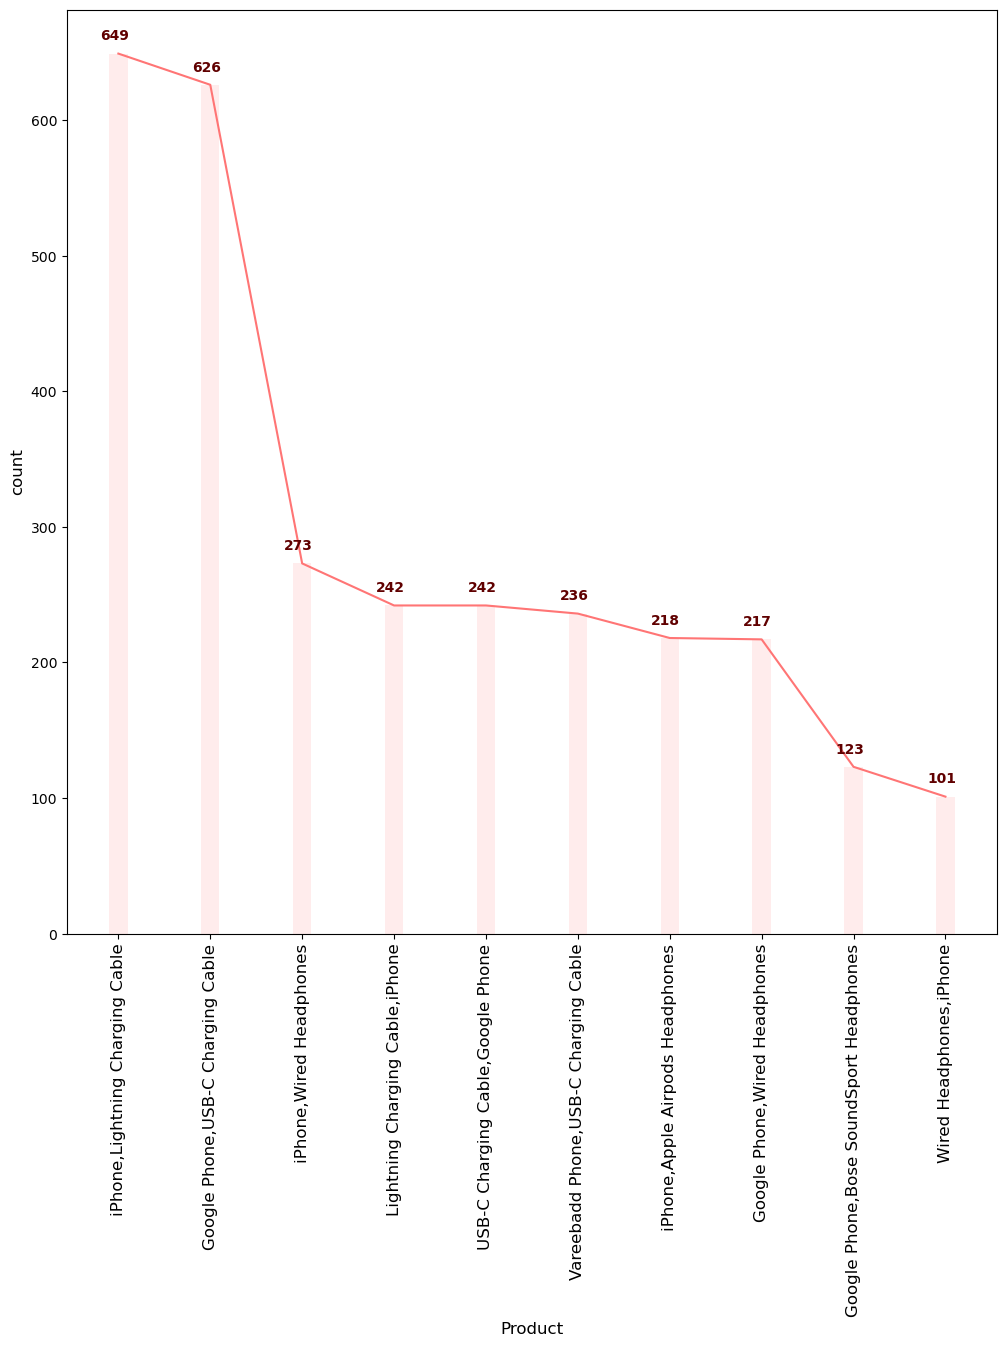

In [104]:
x = df_bundle['Product']
y=df_bundle['count']
fig, ax = plt.subplots(figsize=(12, 12))    
width = 0.2 # the width of the bars 
ind = np.arange(len(x))  # the x locations for the groups
ax.bar(ind, y, width, color="#FFECEC")
ax.set_xticks(ind)
ax.set_xticklabels(x, fontsize=12, rotation=90)
plt.plot(df_bundle['Product'], df_bundle['count'], color='#FF7575')
# plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Product', fontsize=12)
plt.ylabel('count', fontsize=12)    
for i, v in enumerate(y):
    ax.text(i-0.2, v+10, str(v), color='#600000', fontweight='bold')
plt.show()

## Ans: 由上圖可得知前十大一起賣出的商品組合

## Question 5:什麼產品賣的最多？

In [110]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700,NY,00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600,NY,07
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11,NY,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149,CA,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11,GA,12
...,...,...,...,...,...,...,...,...,...,...
186490,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2,MA,19
186491,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149,NY,19
186492,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11,CA,18
186493,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11,CA,18


In [113]:
df_inventory=df.groupby('Product')['Quantity Ordered'].agg(sum).to_frame()
df_inventory['Product']=df_inventory.index
df_inventory=df_inventory[df_inventory.columns[::-1]]
df_inventory=df_inventory.reset_index(drop=True)
df_inventory

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [116]:
df_inventory.sort_values(by='Quantity Ordered', ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


## 由上面表可以得知AAA Batteries賣得最好